In [36]:
import math
import numpy as np
import pylab as pl

# 最小二乘法

In [37]:
def phi_k(x,k):
    return pow(x,k)


def squar_least(x,y,w,n):
    G=np.zeros((n+1,n+1))
    d=np.zeros((n+1))
    for i in range(n+1):
        for j in range(n+1):
            G[i,j]=sum((w*phi_k(x,i))*phi_k(x,j))
    
    for i in range(n+1):
        d[i]=sum((w*phi_k(x,i)*y))
        
    return np.dot(np.linalg.inv(G),d)
    

In [38]:
x=np.array([1,4,9,16,25,36,49,64,81])
y=np.array([1,2,3.1,3.95,5.01,6,6.97,8,9.02])
w=np.array([1,1,1,1,1,1,1,1,1])
print(x.shape,y.shape,w.shape)

(9,) (9,) (9,)


In [39]:
a=squar_least(x,y,w,2)

In [40]:
ans1=a[0]*1+a[1]*2.5+a[2]*pow(2.5,2)
print("x=2.5 f(x)=",ans1)
ans2=a[0]*1+a[1]*40+a[2]*pow(40,2)
print("x=40 f(x)=",ans2)



x=2.5 f(x)= 1.7376157294785475
x=40 f(x)= 6.444116797479468


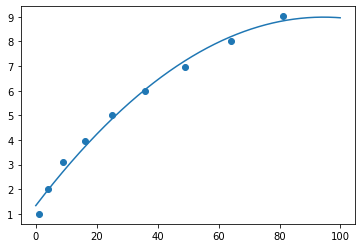

In [41]:
xxx=[]
yyy=[]
for i in range(0,1000):
    xxx.append(i/10)
    yyy.append(a[0]*1+a[1]*i/10+a[2]*i/10*i/10)

pl.scatter(x,y)
pl.plot(xxx,yyy)

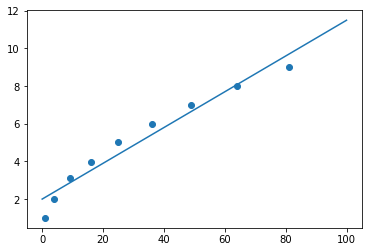

In [42]:
a=squar_least(x,y,w,1)
xxx=[]
yyy=[]
for i in range(0,1000):
    xxx.append(i/10)
    yyy.append(a[0]*1+a[1]*i/10)

pl.scatter(x,y)
pl.plot(xxx,yyy)

# 拉格朗日

In [43]:
def lagelangri(x,y,ans_x):
    ans_y=0
    for i_y in range(len(y)):
        temp=1
        for i_x in range(len(x)):
            if i_x!=i_y :
                temp*=(ans_x-x[i_x])/(x[i_y]-x[i_x])
        ans_y+=y[i_y]*temp
    return ans_y

In [44]:
print("x=2.5 f(x)=",lagelangri(x,y,2.5))
print("x=40 f(x)=",lagelangri(x,y,40))

x=2.5 f(x)= 1.5296665994020477
x=40 f(x)= 6.199927388682746


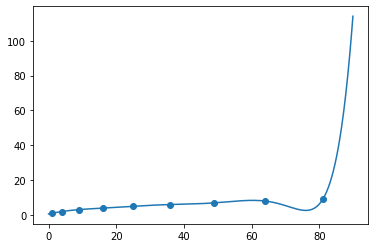

In [45]:
xxx=[]
yyy=[]
for i in range(0,900):
    xxx.append(i/10)
    yyy.append(lagelangri(x,y,i/10))

pl.scatter(x,y)
pl.plot(xxx,yyy)

# 分段线性插值

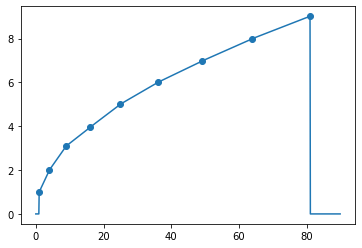

In [46]:
def fenduan(x,y,ans_x):
    ans_y=0
    for i in range(len(x)-1):
        if x[i]<=ans_x<=x[i+1]:
            ans_y=y[i]*((ans_x-x[i+1])/(x[i]-x[i+1]))+y[i+1]*((ans_x-x[i])/(x[i+1]-x[i]))
        
    return ans_y



xxx=[]
yyy=[]
for i in range(0,900):
    xxx.append(i/10)
    yyy.append(fenduan(x,y,i/10))

pl.scatter(x,y)
pl.plot(xxx,yyy)

In [47]:
print("x=2.5 f(x)=",fenduan(x,y,2.5))
print("x=40 f(x)=",fenduan(x,y,40))

x=2.5 f(x)= 1.5
x=40 f(x)= 6.298461538461538


In [48]:
print("x=2.5 sqrt=",math.sqrt(2.5))
print("x=40 sqrt=",math.sqrt(40))

x=2.5 sqrt= 1.5811388300841898
x=40 sqrt= 6.324555320336759
